In [18]:
import numpy as np
import gc
import fnmatch
gc.collect()
import os
import yaml
import matplotlib.pyplot as plt
from collections import deque 
import time

import MDAnalysis as mda

import sys
sys.path.append("../../NMR_FF_tools/relaxation_times/")

gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;
import relaxation_times as rt
import manage_files as mf

In [2]:
class Micelle():
    def __init__(self, name):
        self.name = name
        
        
        self.mindis = {}
        
        self.analysis = {}
        self.cutoffs={}
        self.readInput()
    
    def readInput(self):
        """Reads in the minimal distances of individual SDS molecules from the peptide
        
        Reads also the saving frequency from the input (self.save_freq)
        and number of SDS molecules (self.sds).
        
        The values of mindist for individual SDS molecules are saved 
        in a dictonary self.mindist
        """
        
        with open(self.name,"r") as f:
            for line in f:
                if "#" in line:
                    pass
                elif "@" in line:
                    pass
                else:
                    self.sds=len(line.split())-1
                    break
        
        
        for i in range(1,self.sds+1):
            self.mindis[i]=[]
        
        start = time.time()
        previous = 0
        current = 0
        with open(self.name,"r") as f:
            for line in f:
                if "#" in line:
                    pass
                elif "@" in line:
                    pass
                else:
                    previous = current
                    current = int(float(line.split()[0]))
                    for i in range(1,self.sds+1):
                        self.mindis[i].append(float(line.split()[i]))
        end = time.time()
        self.save_freq = current - previous
        print("Input file read in ",end - start," s")
        
    def plotAveraged(self, average,line):

        
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        for i in range(1,self.sds+1):




            plt.plot(x,self.analysis[average][i])
            plt.axhline(y = line, color = 'black', linestyle = '-')

        plt.xlabel("Simulation time [ns]")
        plt.ylabel("Min-dist from protein [nm]")
        plt.show()
        
        self.cutoffs[average]=line



    def runAnalysis(self, average):
        """
        Averages over "average" consecutive values of "self.mindis".
        
        It does not culculate a running average because that was quite slow.
        It averages "average" consecutive values and save them as a one value
        to self.analysis[average] dictonary.
        """
        
        in_micelle_avr={}
        in_micelle_avr_apu={}
        for i in range(1,self.sds+1):
            in_micelle_avr[i]=[]
            in_micelle_avr_apu[i]=[]

        i=0
        start = time.time()
        #print(len(self.mindis[1]))
        while i< len(self.mindis[1])-average:
            for k in range(1,self.sds+1):
                for j in range(0,average):
                    in_micelle_avr_apu[k].append(self.mindis[k][i+j])
                in_micelle_avr[k].append(np.average(in_micelle_avr_apu[k]))
                
                in_micelle_avr_apu[k]=[]
            i+=average

        end = time.time()
        print("Analysis took ",end - start," s")
        
        self.analysis[average]=in_micelle_avr

        
        

    def plotInMicelle(self,average):
        micelle_size=[]
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
      
        for i in range(len(self.analysis[average][1])):
            number=0
            for j in range(1,self.sds+1):
                if self.analysis[average][j][i]<self.cutoffs[average]:
                    number+=1
            micelle_size.append(number)

        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})



        plt.plot(x,micelle_size)


        plt.show()
        
    def plotAll(self):
        
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        
        for average in self.analysis:
            micelle_size=[]
            x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]

            for i in range(len(self.analysis[average][1])):
                number=0
                for j in range(1,self.sds+1):
                    if self.analysis[average][j][i]<self.cutoffs[average]:
                        number+=1
                micelle_size.append(number)

            


            plt.plot(x,micelle_size,label=average)
        plt.legend(loc="upper left")
        plt.show()
            

In [3]:
sds60=Micelle("GWALP_dimer/60sds_gwalp.xvg")

Input file read in  49.136396408081055  s


In [32]:
len(sds60.mindis[1])

38231

In [4]:
sds60_2=Micelle("GWALP_dimer/mindist_13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")

Input file read in  4.909674644470215  s


In [5]:
sds50=Micelle("GWALP_dimer/mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")

Input file read in  3.978030204772949  s


In [6]:
sds70=Micelle("GWALP_dimer/mindist_142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")

Input file read in  6.545941114425659  s


In [7]:
sds40=Micelle("GWALP_dimer/mindist_12_Gwalp_dimer_40SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")
#sds45=Micelle("mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",50,100)
sds45=Micelle("GWALP_dimer/mindist_11_Gwalp_dimer_45SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")

sds50=Micelle("GWALP_dimer/mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")
sds60=Micelle("GWALP_dimer/mindist_13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")
sds70=Micelle("GWALP_dimer/mindist_142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg")

sds40.runAnalysis(50)
sds45.runAnalysis(50)
sds50.runAnalysis(50)
sds60.runAnalysis(50)
sds70.runAnalysis(50)

Input file read in  2.649515151977539  s
Input file read in  4.063724994659424  s
Input file read in  4.0355236530303955  s
Input file read in  5.017473220825195  s
Input file read in  6.3722991943359375  s
Analysis took  0.5165979862213135  s
Analysis took  0.6678619384765625  s
Analysis took  0.6378226280212402  s
Analysis took  0.6694474220275879  s
Analysis took  0.7324469089508057  s


In [8]:
hMff40_2=Micelle("mindist_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg")
hMff40_3=Micelle("mindist_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg")
hMff45_2=Micelle("mindist_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg")
hMff45_3=Micelle("mindist_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg")
hMff50_2=Micelle("mindist_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg")
hMff50_3=Micelle("mindist_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg")
hMff60_2=Micelle("mindist_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg")
hMff60_3=Micelle("mindist_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg")


hMff40_2.runAnalysis(50)
hMff40_3.runAnalysis(50)

hMff45_2.runAnalysis(50)
hMff45_3.runAnalysis(50)

hMff50_2.runAnalysis(80)
hMff50_3.runAnalysis(80)

hMff60_2.runAnalysis(80)
hMff60_3.runAnalysis(80)

Input file read in  1.805556058883667  s
Input file read in  1.8249974250793457  s
Input file read in  2.42149019241333  s
Input file read in  2.416496992111206  s
Input file read in  2.8783676624298096  s
Input file read in  2.870880365371704  s
Input file read in  4.124607086181641  s
Input file read in  4.098804712295532  s
Analysis took  0.34518885612487793  s
Analysis took  0.34970879554748535  s
Analysis took  0.3952140808105469  s
Analysis took  0.3896636962890625  s
Analysis took  0.36873745918273926  s
Analysis took  0.3640570640563965  s
Analysis took  0.4398806095123291  s
Analysis took  0.43724989891052246  s


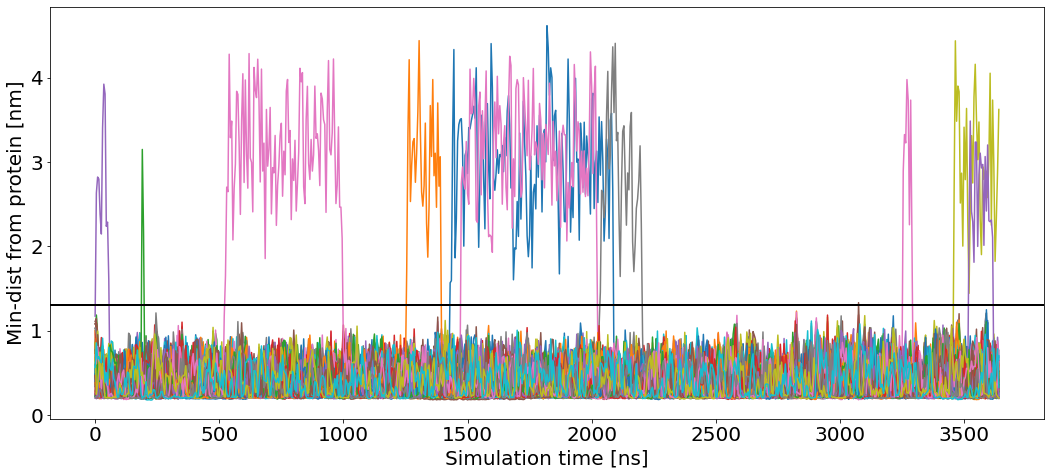

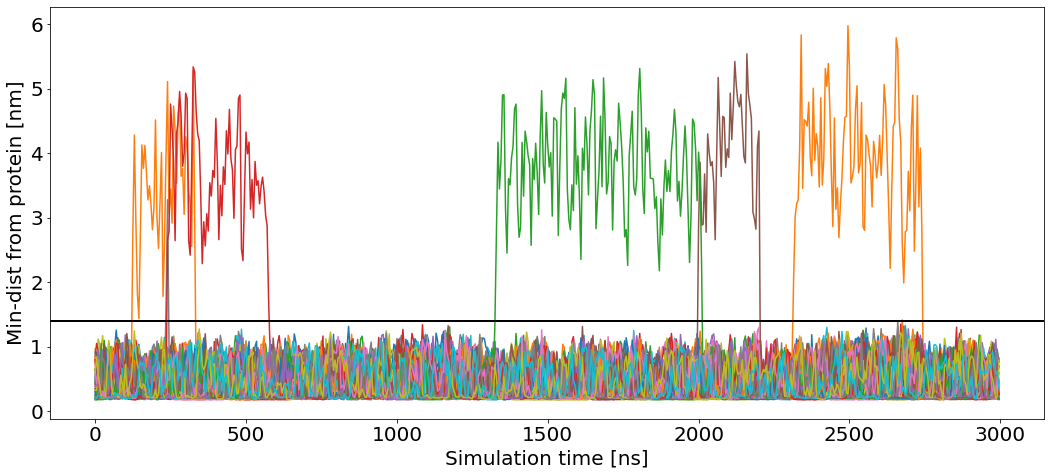

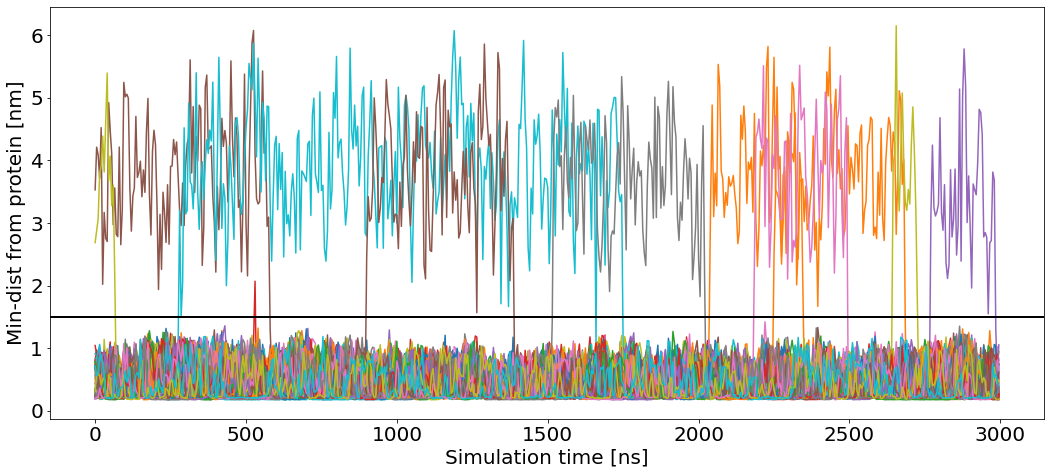

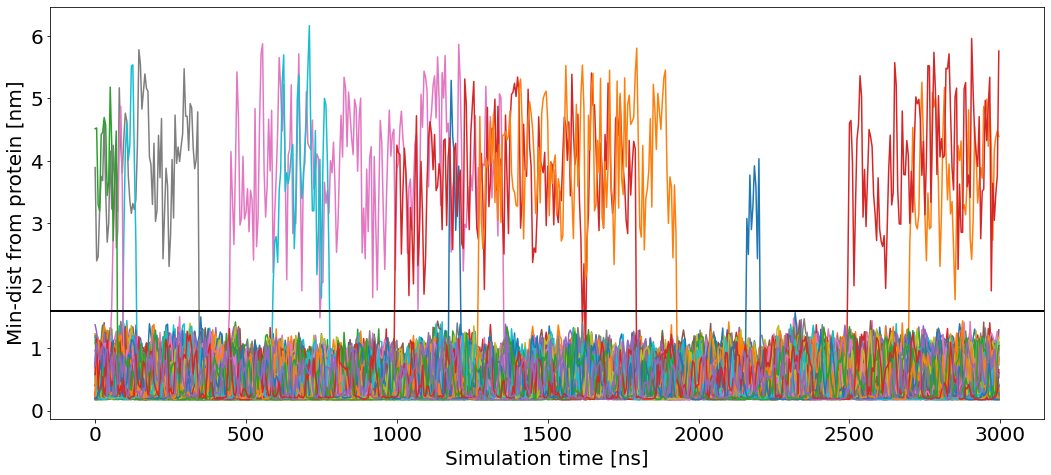

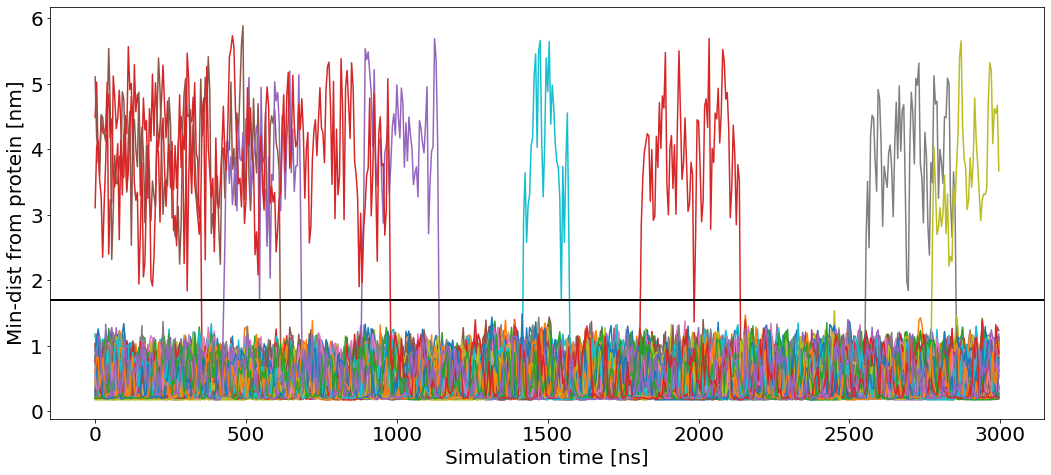

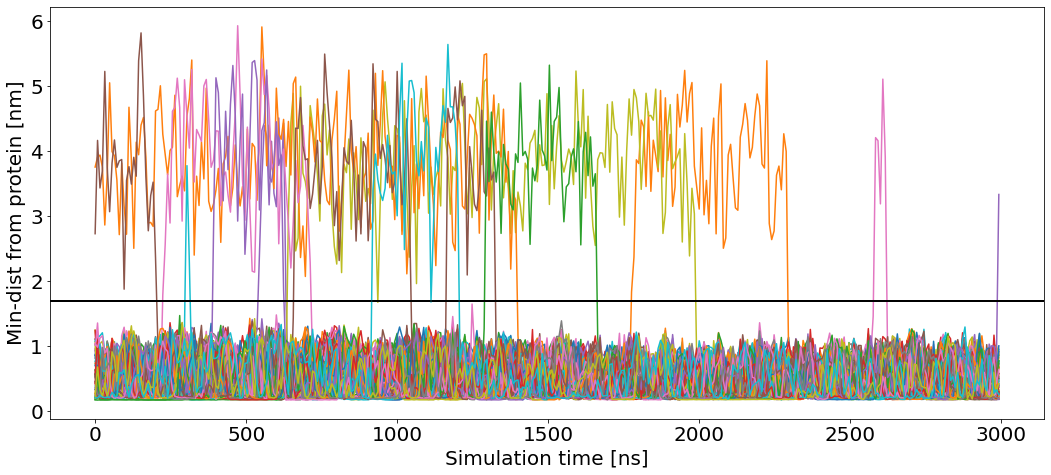

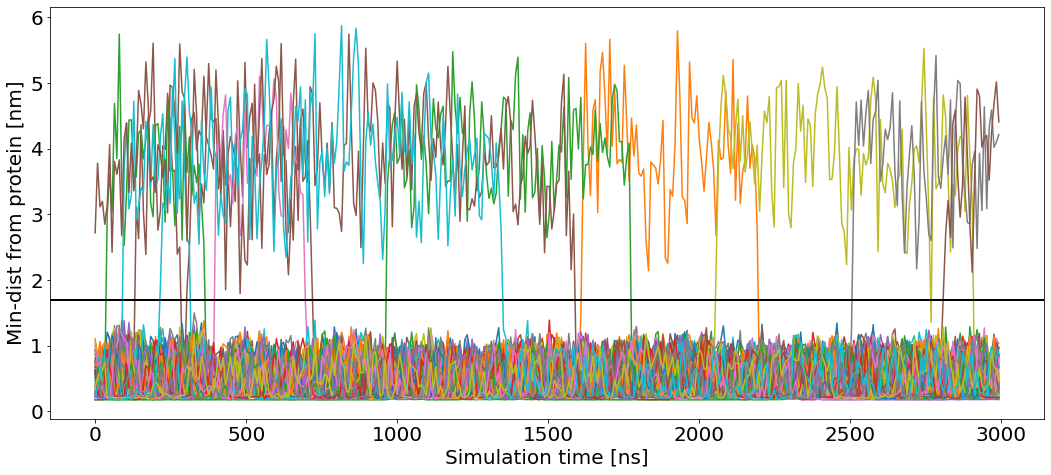

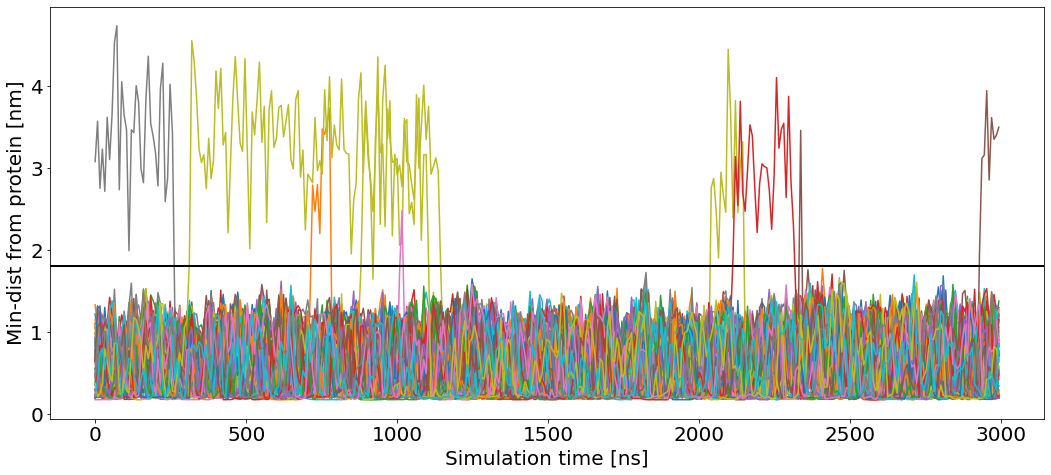

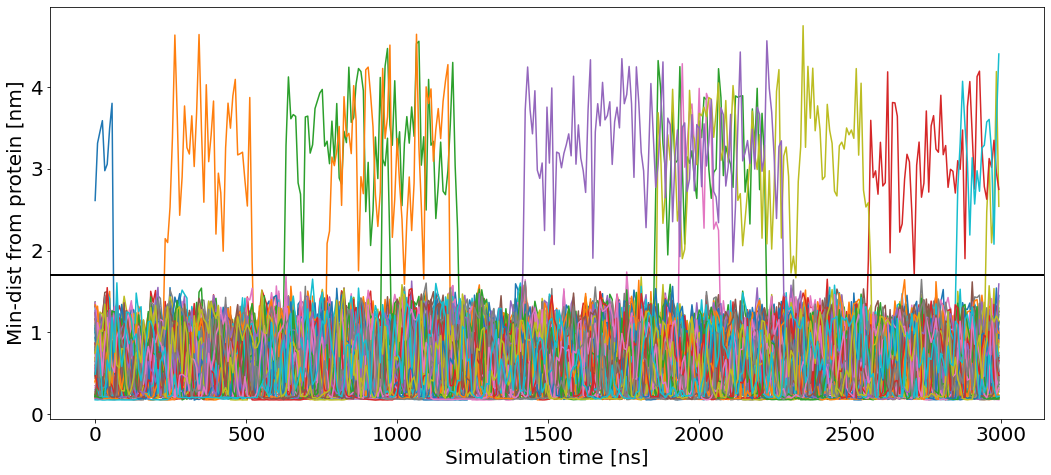

In [9]:
hMff40_2.plotAveraged(50,1.4)
hMff40_3.plotAveraged(50,1.5)

hMff45_2.plotAveraged(50,1.6)
hMff45_3.plotAveraged(50,1.7)

hMff50_2.plotAveraged(80,1.7)
hMff50_3.plotAveraged(80,1.7)

hMff60_2.plotAveraged(80,1.8)
hMff60_3.plotAveraged(80,1.7)

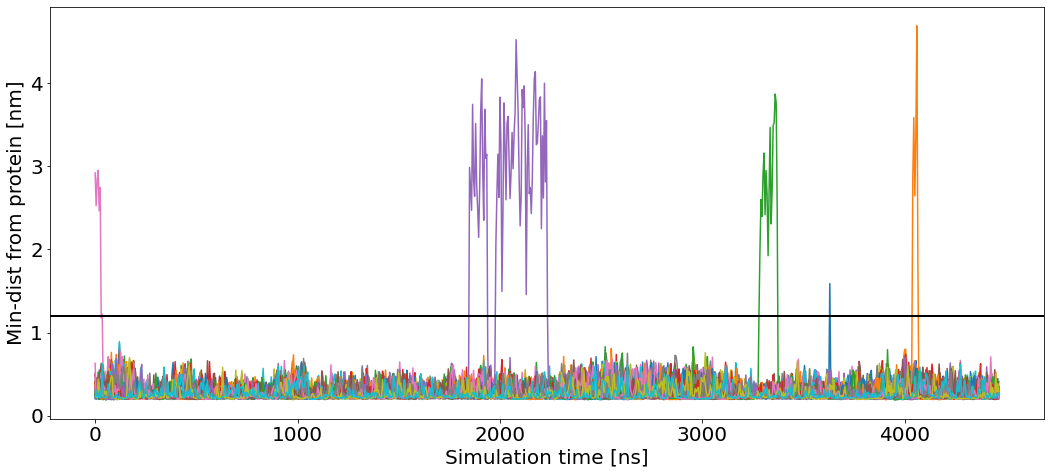

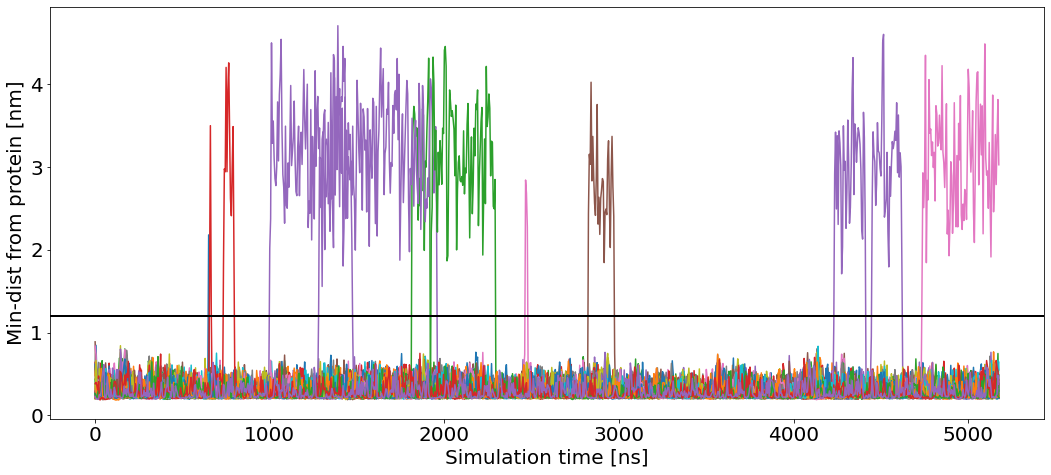

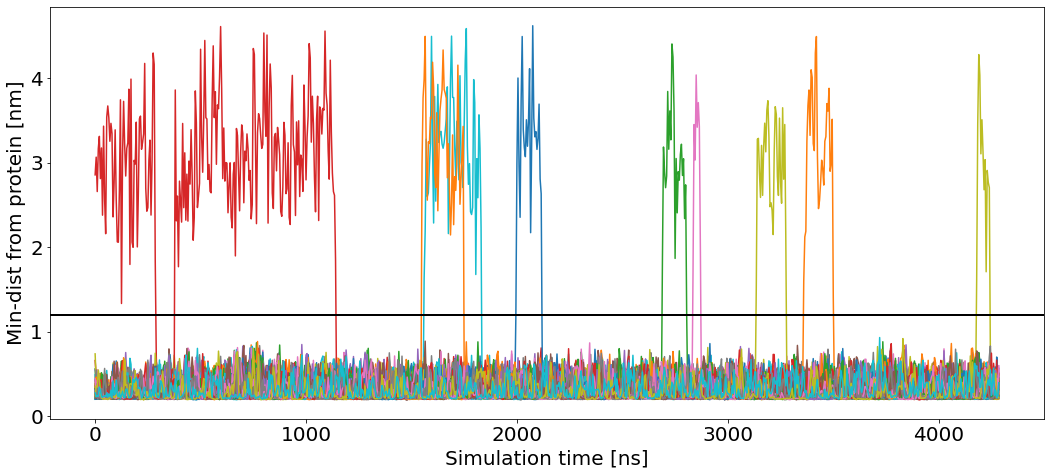

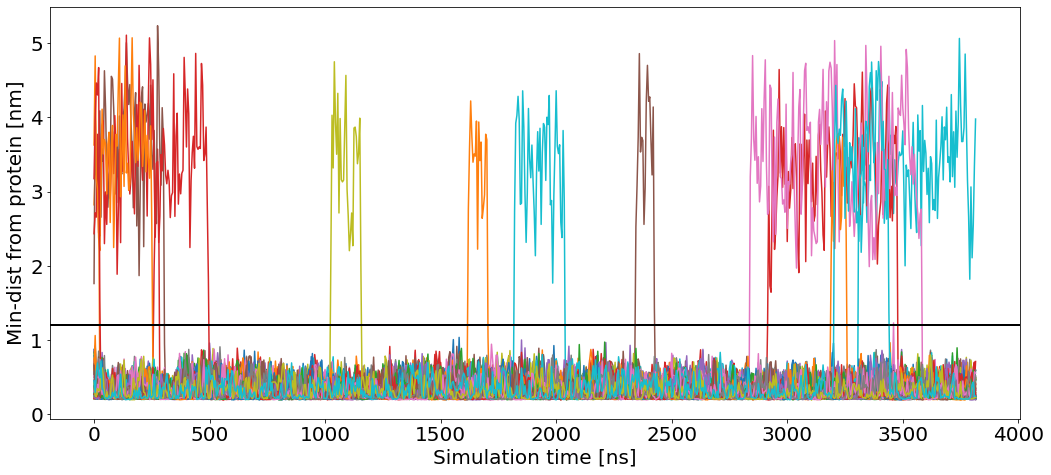

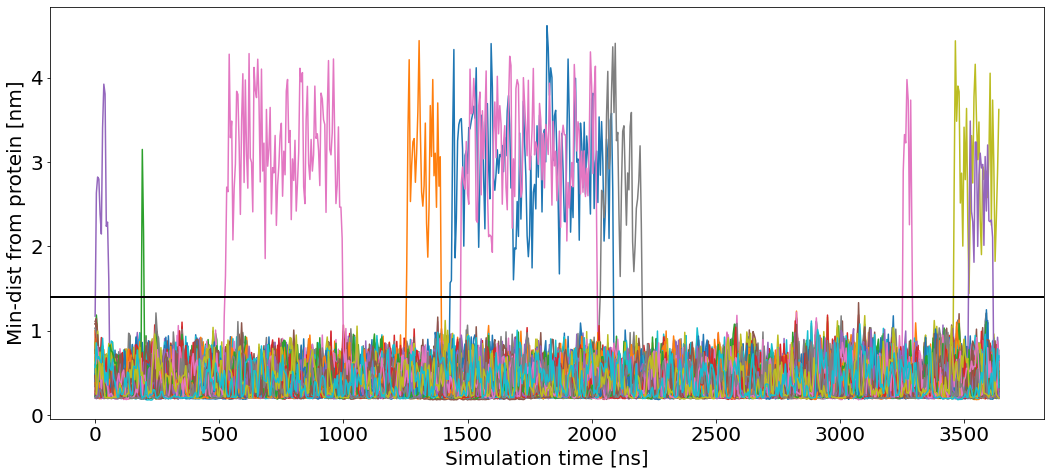

In [10]:
sds40.plotAveraged(50,1.2)
sds45.plotAveraged(50,1.2)
sds50.plotAveraged(50,1.2)
sds60.plotAveraged(50,1.2)
sds70.plotAveraged(50,1.4)

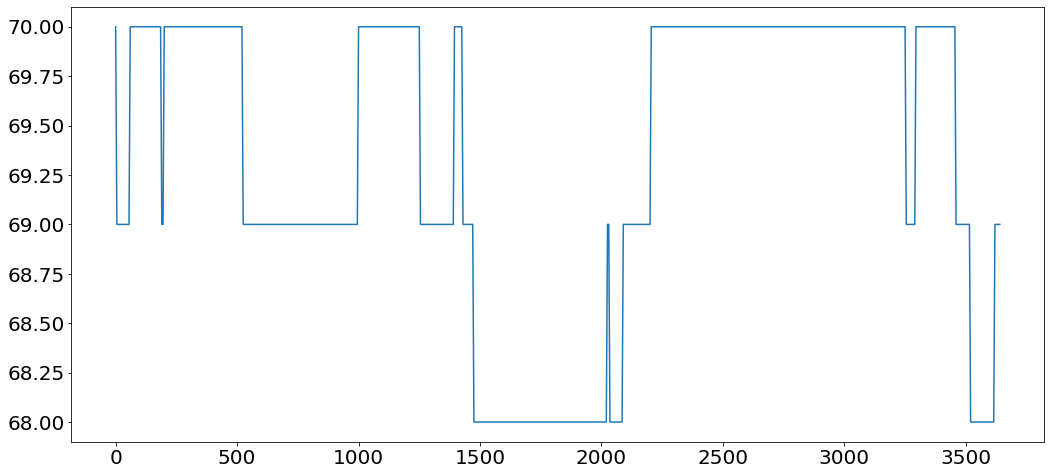

In [48]:
sds70.plotInMicelle(50)

KeyError: 50

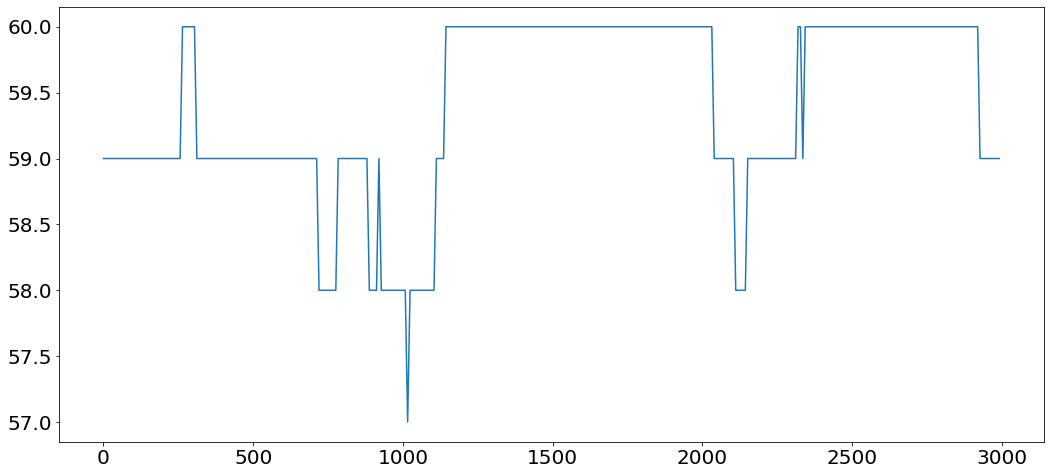

In [57]:
#sds70.plotAll()
hMff60_2.plotAll()

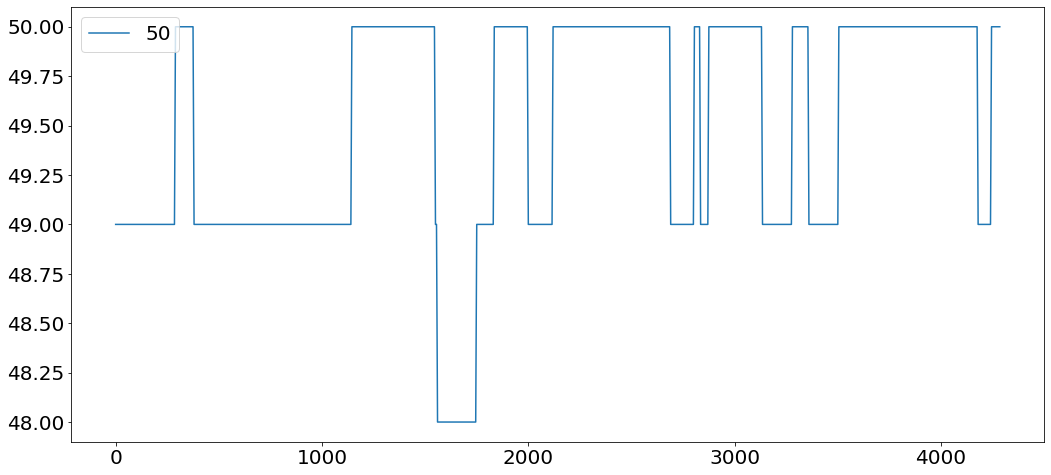

In [49]:
sds50.plotAll()

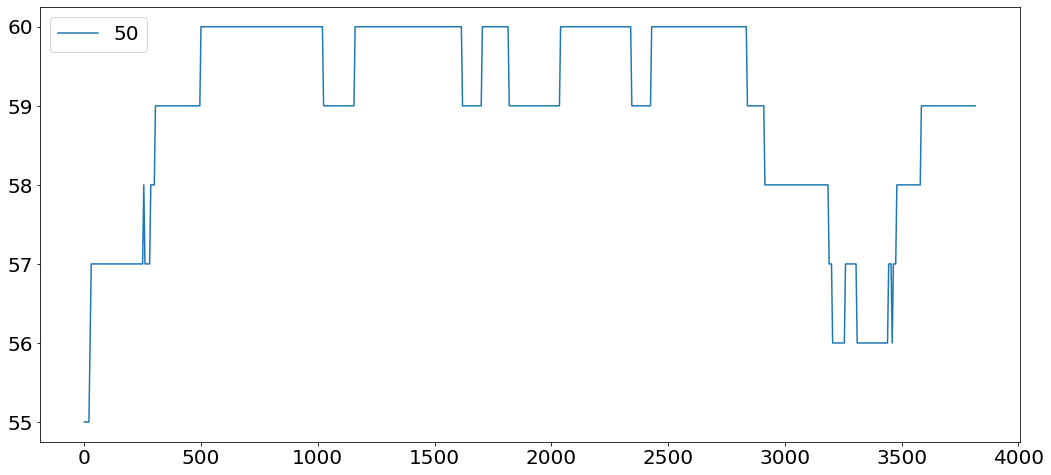

In [50]:
sds60.plotAll()

In [11]:
def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()

    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y

    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])

    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)/10

In [12]:
def skip_traj(file,folder_path):
    path=folder_path+file+"/"
    
    readme=path+"README.yaml"
    with open(readme) as yaml_file:
        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
        
    print("Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...")
    start = time.time()
    os.system("echo 'System'|gmx trjconv -f whole_"+ file+"_center_pbc_atom.xtc -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -o "+file+"_center_pbc_atom_skip.xtc  -pbc mol -skip 10 >/dev/null 2>&1")
    end = time.time()
    print("Trjconv took ",end - start," s")
    
def get_gyration(file,folder_path,micelle,average):
    #skip_traj(file,folder_path)

    start = time.time()
    u = mda.Universe(file+".gro", file+"_center_pbc_atom_skip.xtc")
    end = time.time()
    print("Load of trajectory takes ",end - start," s")
    print("traj frames",len(u.trajectory))
    print("corresponding file", len(micelle.analysis[average][1]))
    
    print("their ratio",len(u.trajectory)/len(micelle.analysis[average][1]))
    sds=u.select_atoms('resname SDS ')


    start = time.time()
    radius=[]
    
    divide=len(u.trajectory)/len(micelle.analysis[average][1])*1000
    test_times=[]
    lipid_gone=[]
    for frame in u.trajectory:
        test_times.append(u.trajectory.ts.time)
        select="protein or "
        lipi=0
        for i,resid in enumerate(set(sds.resids)):
            if micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)]<micelle.cutoffs[average]:
                select+="resid "+str(resid)+" or "
                lipi+=1
                
            #else:
            #    print("resid ",resid, ", time ",u.trajectory.ts.time,int(u.trajectory.ts.time//divide)*int(average/1000*micelle.save_freq),micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)])
        
        lipid_gone.append(lipi)
                
        select=select[:-4]
        sdsIn=u.select_atoms(select)

        radius.append(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses))[0])
        
        
        #print(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses)))
        #print(u.trajectory.ts.time//5000)

    end = time.time()
    print("Calculation of radius of gyration takes ",end - start," s")
    print("Average radius is ",np.average(radius),"\n ")
    
    
    plt.rcParams["figure.figsize"] = [15.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams.update({'font.size': 20})


    plt.plot(test_times,lipid_gone)
    
    
    micelle_size=[]
      
    for i in range(len(micelle.analysis[average][1])):
        number=0
        for j in range(1,micelle.sds+1):
            if micelle.analysis[average][j][i]<micelle.cutoffs[average]:
                number+=1
        micelle_size.append(number)
    
    x40=[*range(0,len(micelle.analysis[average][1])*int(divide),int(divide))]
    plt.plot(x40,micelle_size)

    plt.show()
    
    
    return radius

In [60]:
sds70.cutoffs

{50: 1.4}

Load of trajectory takes  0.027141571044921875  s
traj frames 4473
corresponding file 894
their ratio 5.003355704697986
Calculation of radius of gyration takes  23.25617551803589  s
Average radius is  1.5065701983507784 
 


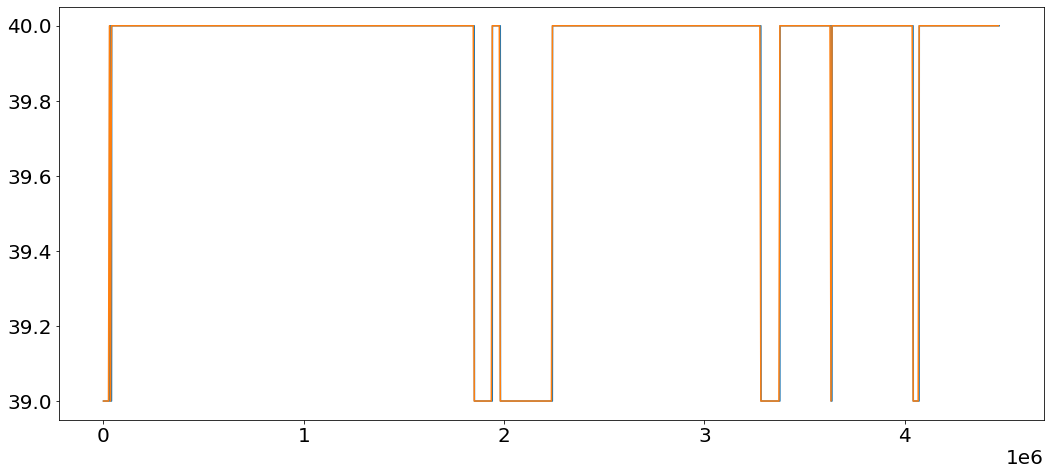

Load of trajectory takes  0.018294095993041992  s
traj frames 5185
corresponding file 1036
their ratio 5.004826254826255
Calculation of radius of gyration takes  29.650760173797607  s
Average radius is  1.5456231093392014 
 


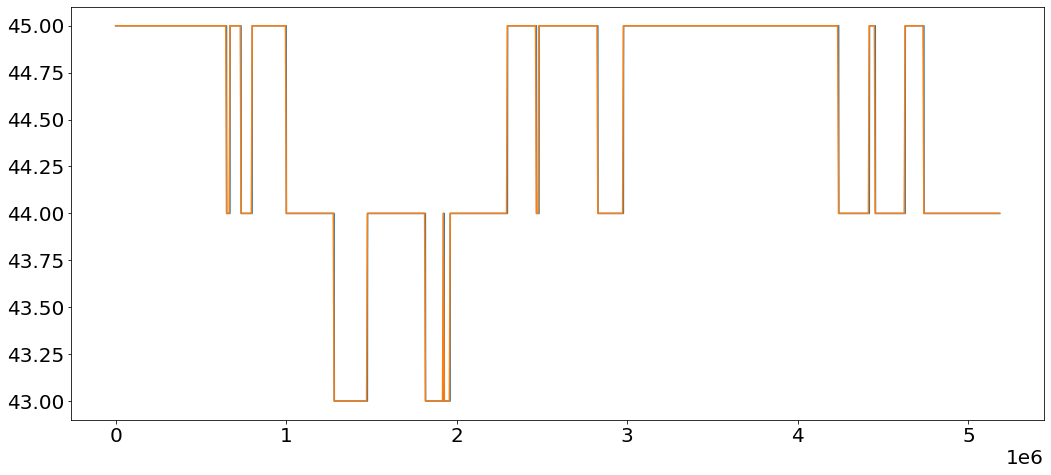

Load of trajectory takes  0.023527860641479492  s
traj frames 4295
corresponding file 858
their ratio 5.005827505827506
Calculation of radius of gyration takes  27.416648387908936  s
Average radius is  1.5889558255795142 
 


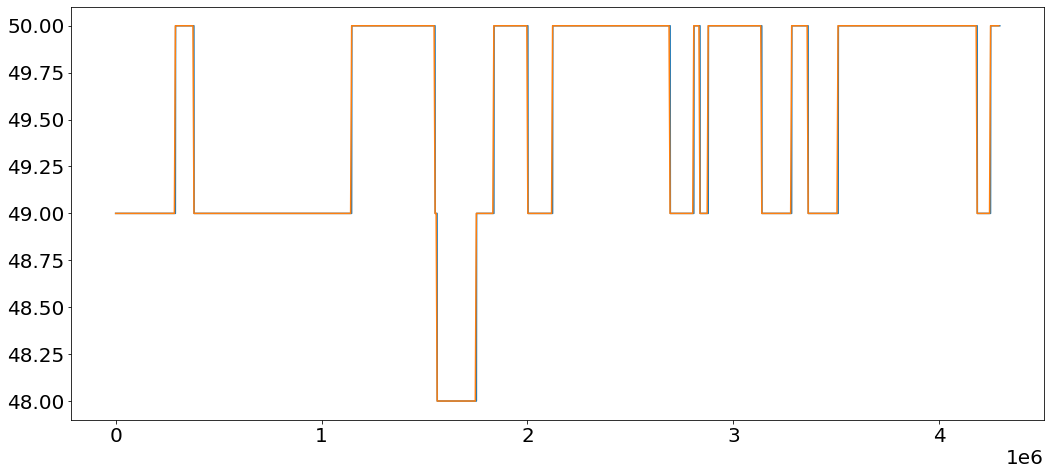

Load of trajectory takes  0.020923137664794922  s
traj frames 3824
corresponding file 764
their ratio 5.005235602094241
Calculation of radius of gyration takes  28.890929222106934  s
Average radius is  1.6763320542205884 
 


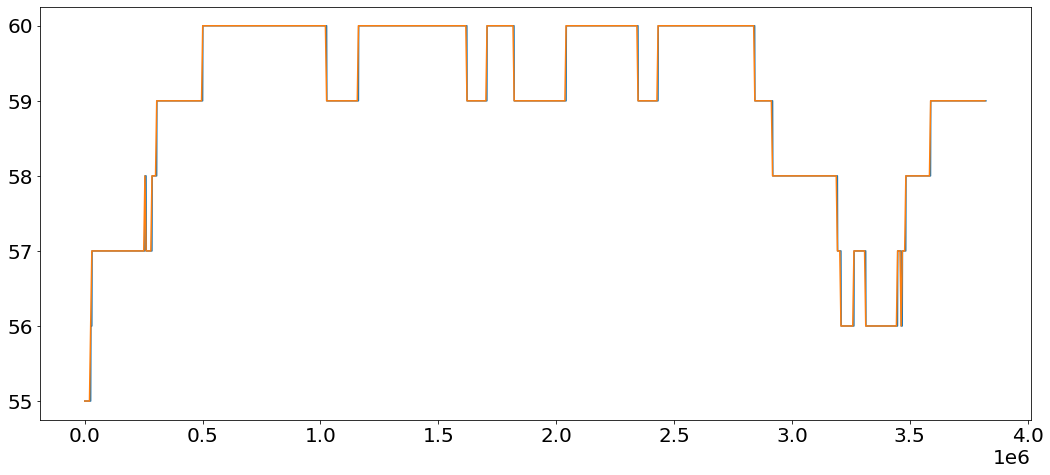

Load of trajectory takes  0.023075342178344727  s
traj frames 3646
corresponding file 729
their ratio 5.001371742112483
Calculation of radius of gyration takes  33.64748549461365  s
Average radius is  1.7718416490865438 
 


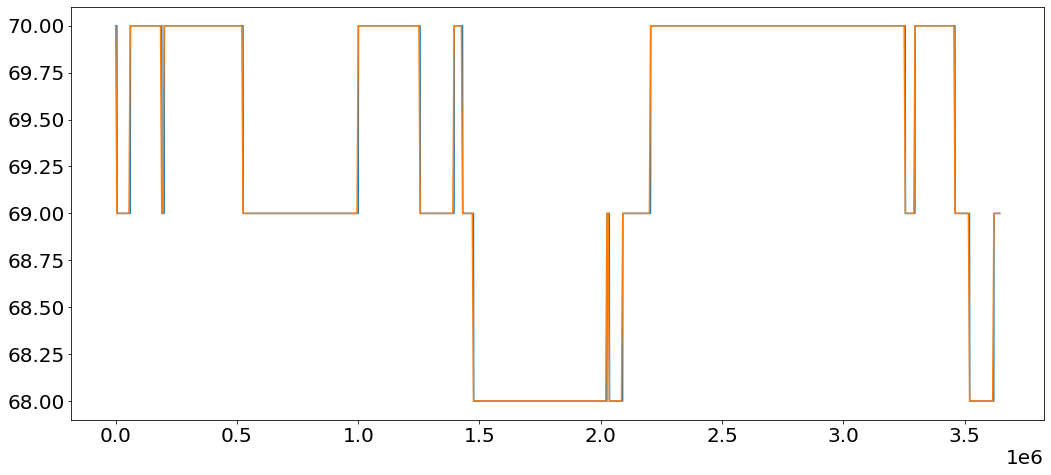

In [13]:
#file="13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
folder_path="/media/nenciric/7686706b-e3c8-4ac3-a074-769f122a69d6/CoryPeptides/mahti/GWALP_dimers/"

file="GWALP_dimer/12_Gwalp_dimer_40SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius40=get_gyration(file,folder_path,sds40,50)

file="GWALP_dimer/11_Gwalp_dimer_45SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius45=get_gyration(file,folder_path,sds45,50)

file="GWALP_dimer/1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius50=get_gyration(file,folder_path,sds50,50)

file="GWALP_dimer/13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius60=get_gyration(file,folder_path,sds60,50)

file="GWALP_dimer/142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius70=get_gyration(file,folder_path,sds70,50)


#file="11_Gwalp_dimer_45SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
#radius45=get_gyration(file,folder_path,sds45,50)

   

Load of trajectory takes  0.018469810485839844  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  14.450718641281128  s
Average radius is  1.4845198622140952 
 


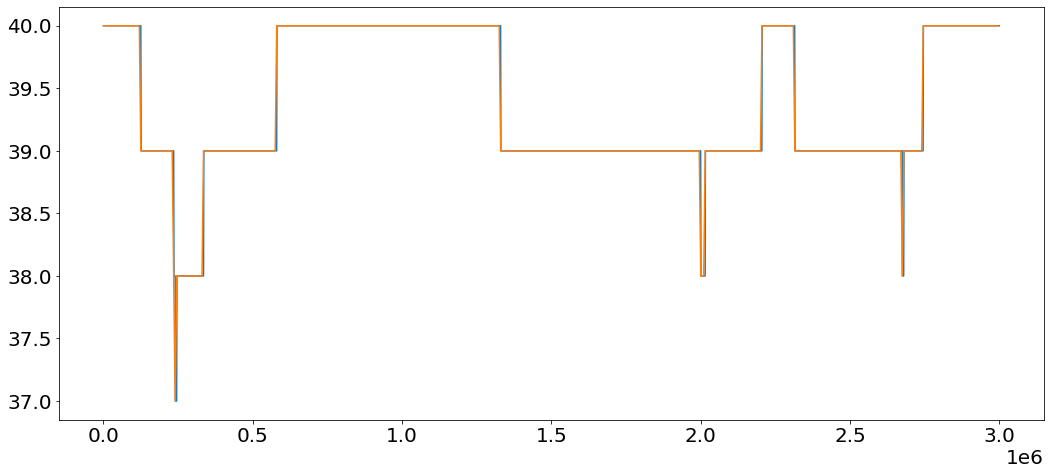

Load of trajectory takes  0.014995574951171875  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  13.699839353561401  s
Average radius is  1.4782552339329889 
 


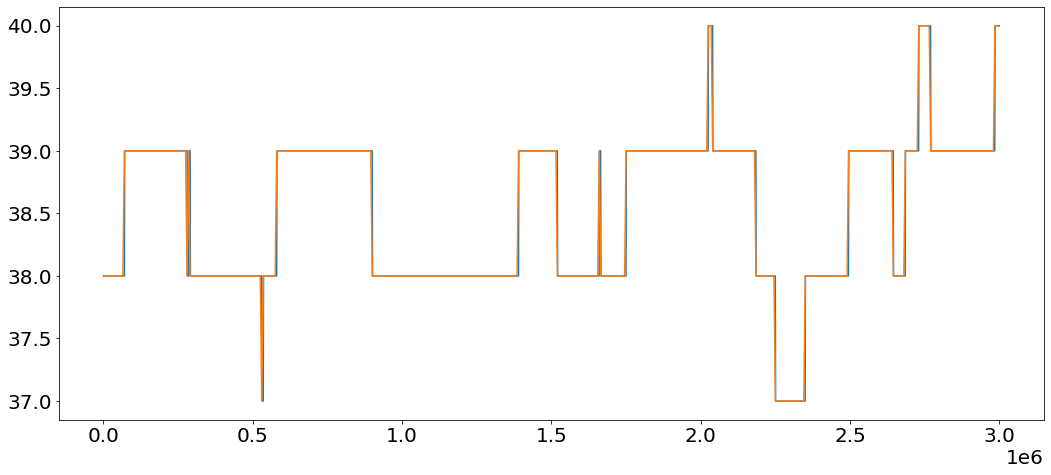

Load of trajectory takes  0.01736736297607422  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  16.171098232269287  s
Average radius is  1.5246983682966917 
 


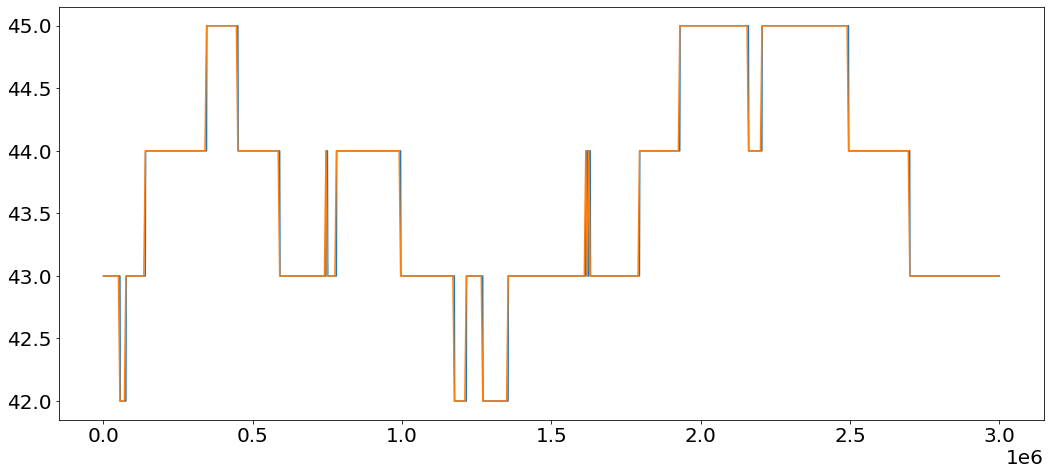

Load of trajectory takes  0.016153335571289062  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  16.171743154525757  s
Average radius is  1.5290041340579668 
 


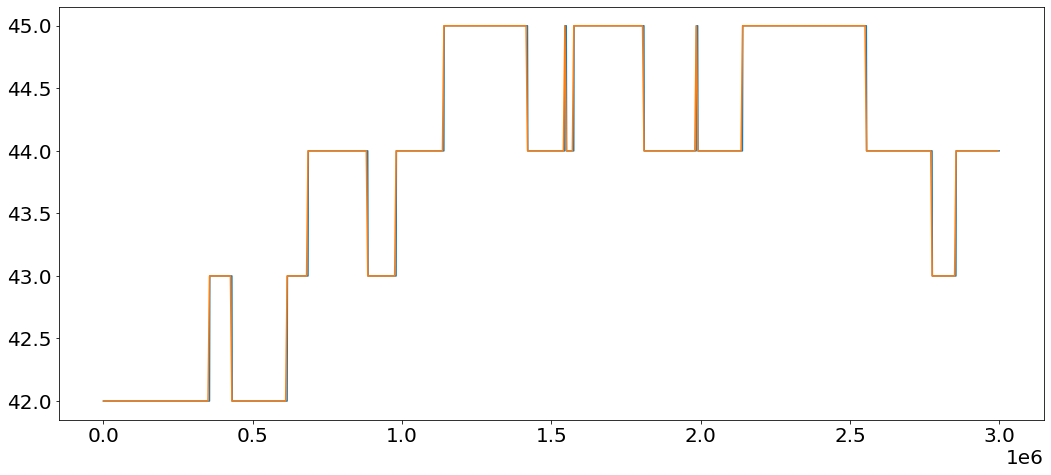

Load of trajectory takes  0.019107818603515625  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  17.756798028945923  s
Average radius is  1.5754649908866554 
 


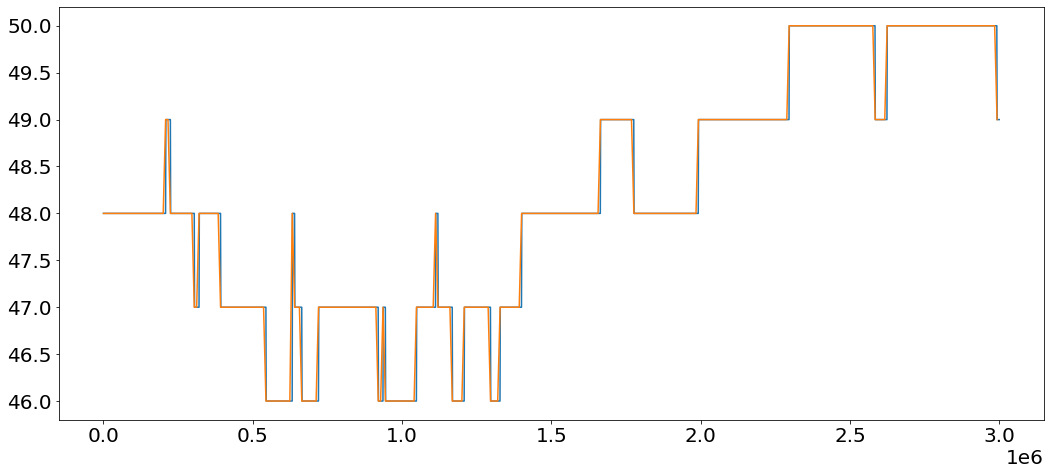

Load of trajectory takes  0.01910567283630371  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  18.277108430862427  s
Average radius is  1.5772961981501867 
 


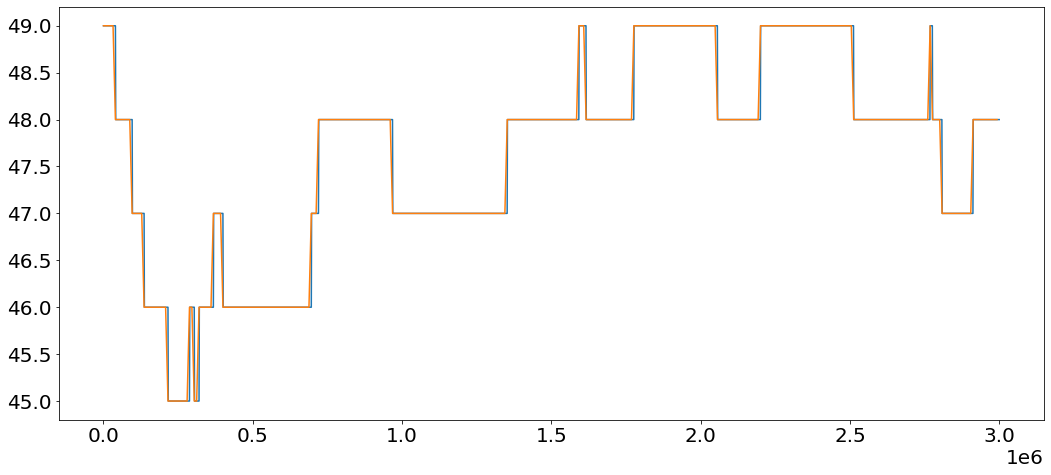

Load of trajectory takes  0.02037644386291504  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  21.371792793273926  s
Average radius is  1.7165306743963464 
 


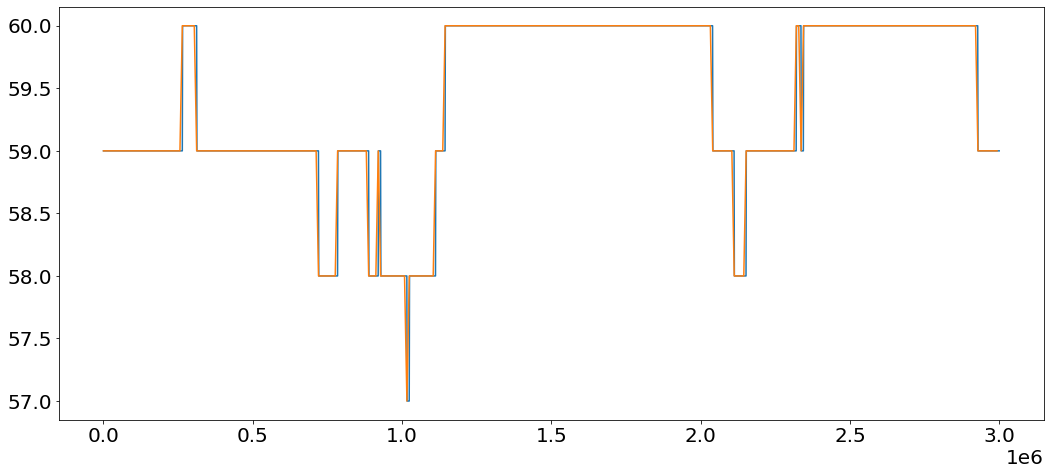

Load of trajectory takes  0.02153182029724121  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  20.987343311309814  s
Average radius is  1.6919528162090784 
 


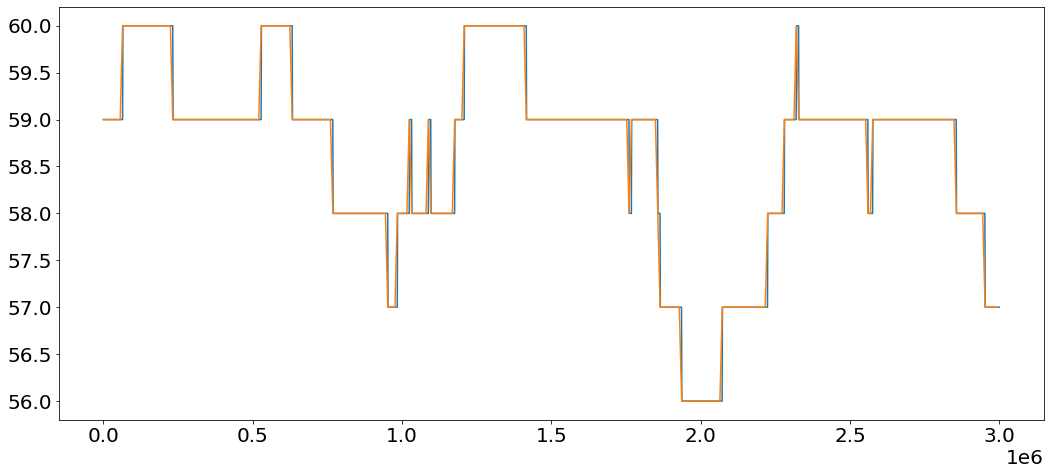

In [14]:
folder_path="/media/nenciric/7686706b-e3c8-4ac3-a074-769f122a69d6/CoryPeptides/new_replicas/"
file="hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_40_2=get_gyration(file,folder_path,hMff40_2,50)

file="hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_40_3=get_gyration(file,folder_path,hMff40_3,50)


file="hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_45_2=get_gyration(file,folder_path,hMff45_2,50)

file="hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_45_3=get_gyration(file,folder_path,hMff45_3,50)

file="hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_50_2=get_gyration(file,folder_path,hMff50_2,80)

file="hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_50_3=get_gyration(file,folder_path,hMff50_3,80)

file="hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_60_2=get_gyration(file,folder_path,hMff60_2,80)

file="hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_60_3=get_gyration(file,folder_path,hMff60_3,80)


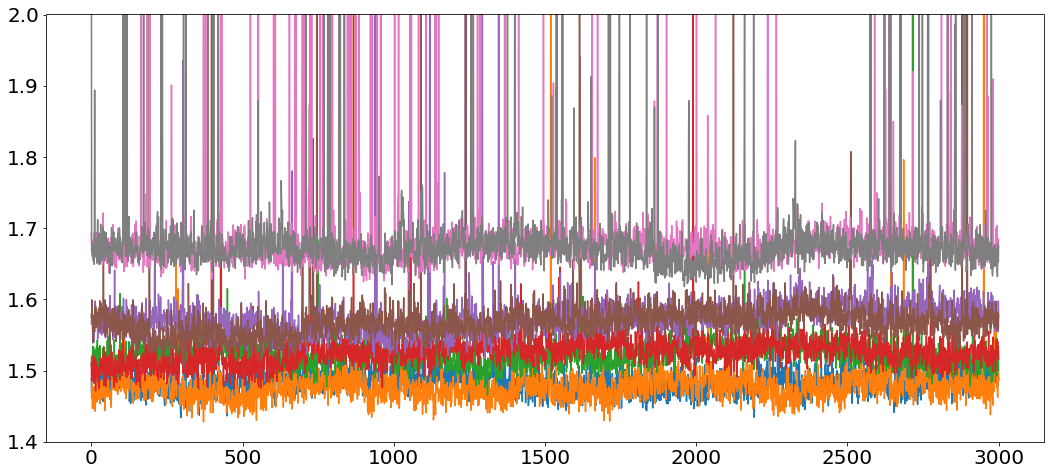

In [15]:
x40=[*range(0,len(radius_hMff_40_2),1)]
x45=[*range(0,len(radius_hMff_45_2),1)]
x50=[*range(0,len(radius_hMff_50_2),1)]
x60=[*range(0,len(radius_hMff_60_2),1)]
x603=[*range(0,len(radius_hMff_60_3),1)]


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
        
plt.ylim(1.4,2)

plt.plot(x40,radius_hMff_40_2)
plt.plot(x40,radius_hMff_40_3)



plt.plot(x45,radius_hMff_45_2)
plt.plot(x45,radius_hMff_45_3)


plt.plot(x50,radius_hMff_50_2)
plt.plot(x50,radius_hMff_50_3)


plt.plot(x60,radius_hMff_60_2)
plt.plot(x603,radius_hMff_60_3)

        
plt.show()

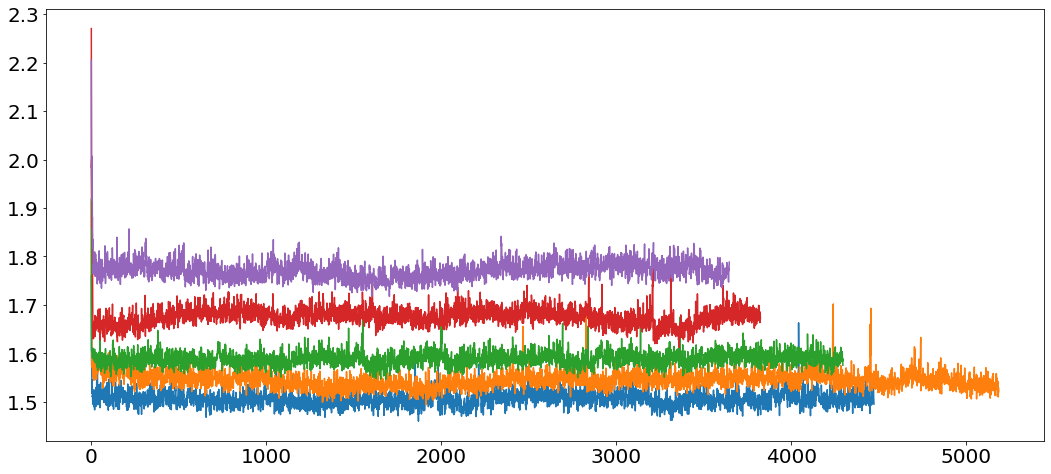

In [16]:
x40=[*range(0,len(radius40),1)]
x45=[*range(0,len(radius45),1)]
x50=[*range(0,len(radius50),1)]
x60=[*range(0,len(radius60),1)]
x70=[*range(0,len(radius70),1)]

plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
        
        

plt.plot(x40,radius40)
plt.plot(x45,radius45)
plt.plot(x50,radius50)
plt.plot(x60,radius60)
plt.plot(x70,radius70)



        
plt.show()

In [70]:
1/(1.380649 * 10**(-23)*310/(8*np.pi*0.0006913*(np.average(radius_hMff_40_3)*10**(-9))**3))/6*10**9

2.1835646936141724

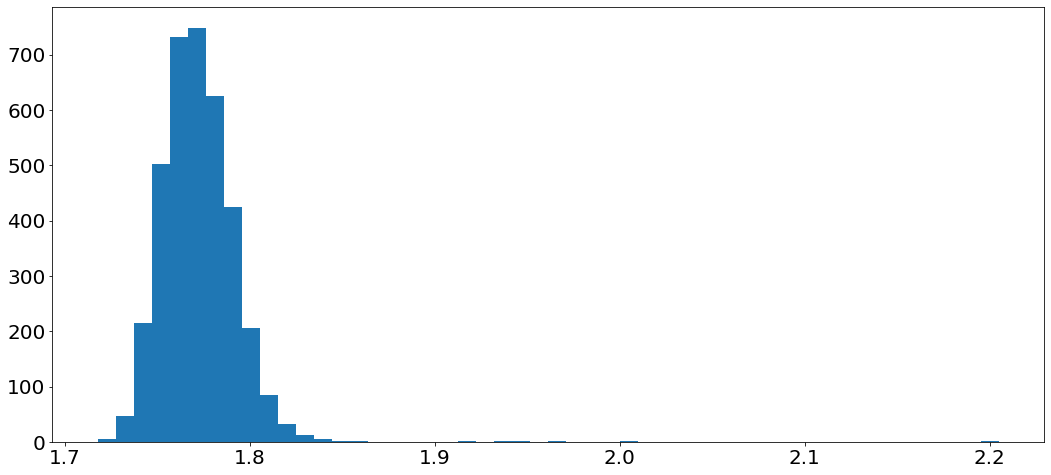

In [97]:
plt.hist(radius70, bins=50)
plt.show()

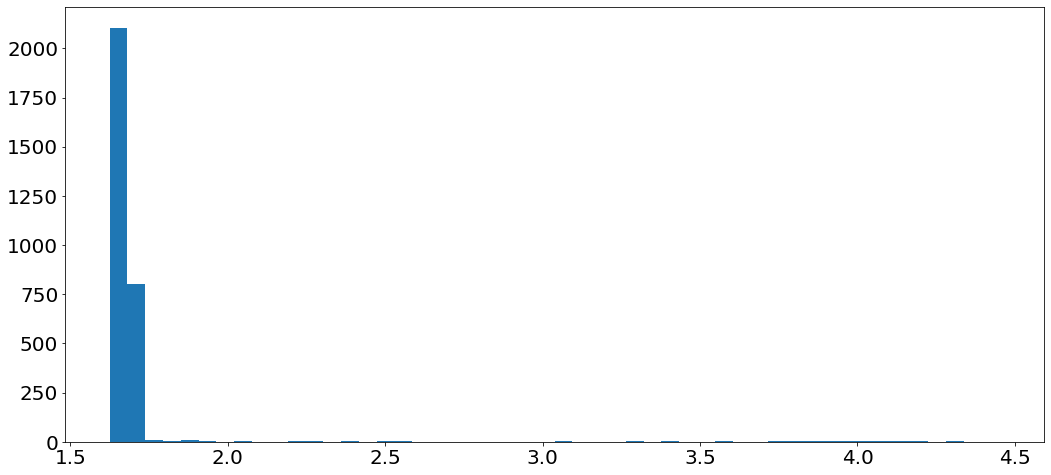

In [303]:
plt.hist(radius_hMff_60_2, bins=50)
plt.show()


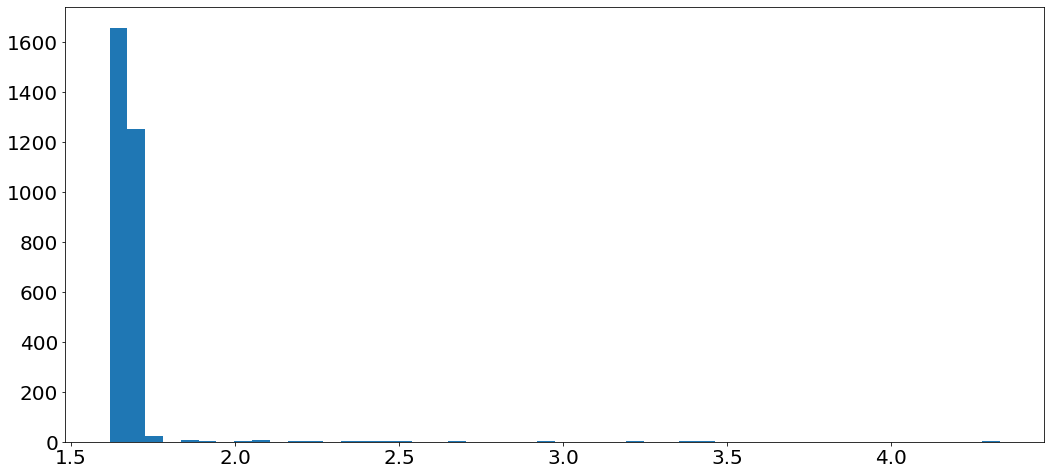

In [335]:
plt.hist(radius_hMff_60_3, bins=50)
plt.show()

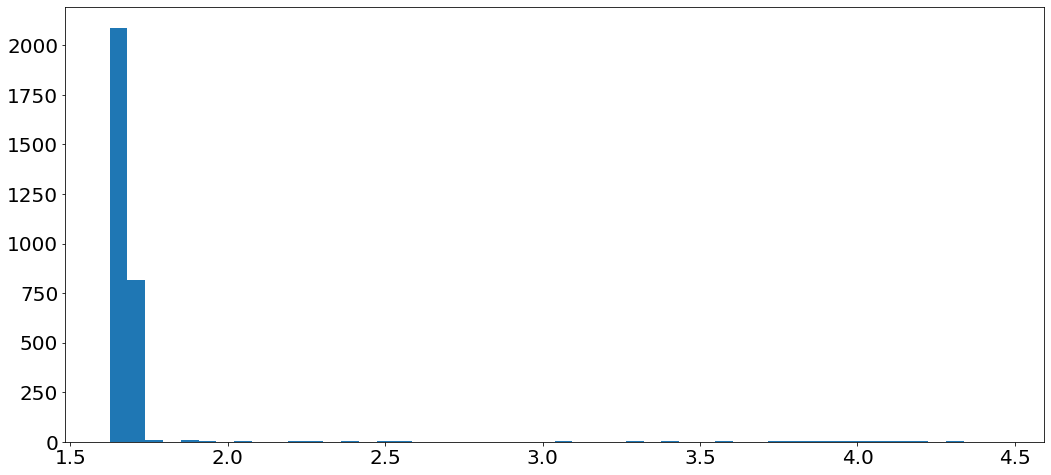

In [344]:
plt.hist(radius_hMff_60_2, bins=50)
plt.show()

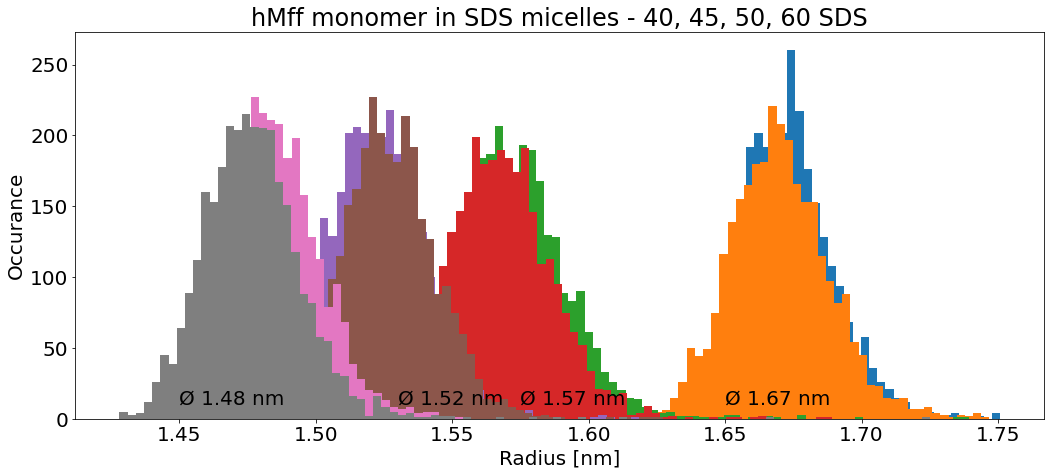

In [395]:
binwidth=0.003
sor=[i for i in radius_hMff_60_2 if i<1.75]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_60_3 if i<1.75]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.65, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")

sor=[i for i in radius_hMff_50_2 if i<1.75]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_50_3 if i<1.7]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.575, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")
sor=[i for i in radius_hMff_45_2 if i<1.65]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_45_3 if i<1.65]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.53, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")
sor=[i for i in radius_hMff_40_2 if i<1.6]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_40_3 if i<1.75]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))
plt.text(1.45, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")

#plt.text(1.7, 200,"$k_b$ T" )
plt.xlabel("Radius [nm]")
plt.ylabel("Occurance")
plt.title("hMff monomer in SDS micelles - 40, 45, 50, 60 SDS")
plt.show()

In [13]:
import sys
sys.path.append("../../NMR_FF_tools/relaxation_times/")

gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;
import relaxation_times as rt
import manage_files as mf

In [19]:
output_path_relax="../relax_times_yamls/protein/raw_data//"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../timescales_yamls/protein/raw_data//"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * yFis1_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model
   * GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2


In [20]:
hmff=[timescales_yamls["hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2"]["analysis0"],
     timescales_yamls["hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3"]["analysis0"],
     timescales_yamls["hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2"]["analysis0"],
     timescales_yamls["hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3"]["analysis0"],
     timescales_yamls["hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2"]["analysis0"],
     timescales_yamls["hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3"]["analysis0"],
     timescales_yamls["hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2"]["analysis0"],
     timescales_yamls["hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3"]["analysis0"]]

GWALP=[timescales_yamls["GWALP_dimer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1"]["analysis0"],
      timescales_yamls["GWALP_dimer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1"]["analysis0"],
      timescales_yamls["GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica1"]["analysis0"],
      timescales_yamls["GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica1"]["analysis0"]]

In [21]:
aikaskaalat_hmff=[]
for dicOfAA in hmff:
    avr=0
    for key in dicOfAA["results"]["Coeff"]:
        avr+=dicOfAA["results"]["Ctime"][np.argmax(dicOfAA["results"]["Coeff"][key])]/len(dicOfAA["results"]["Coeff"])
    print("biggest timescale: ",avr)
    aikaskaalat_hmff.append(1/((avr*10**9)))
    
aikaskaalat_gwalp=[]
for dicOfAA in GWALP:
    avr=0
    for key in dicOfAA["results"]["Coeff"]:
        avr+=dicOfAA["results"]["Ctime"][np.argmax(dicOfAA["results"]["Coeff"][key])]/len(dicOfAA["results"]["Coeff"])
    print("biggest timescale: ",avr)
    aikaskaalat_gwalp.append(1/((avr*10**9)))

biggest timescale:  5.3888785644027824e-09
biggest timescale:  5.027159050683326e-09
biggest timescale:  6.202883706845212e-09
biggest timescale:  5.736229184057595e-09
biggest timescale:  6.2220709119992405e-09
biggest timescale:  6.363008675389706e-09
biggest timescale:  7.56509807729159e-09
biggest timescale:  6.733441262142668e-09
biggest timescale:  5.737676712827629e-09
biggest timescale:  6.093936346820665e-09
biggest timescale:  7.725435525950517e-09
biggest timescale:  6.892545544871394e-09


In [22]:
radius_hmff=[]
sor=[i for i in radius_hMff_40_2 if i<1.6]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_40_3 if i<1.6]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_45_2 if i<1.65]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_45_3 if i<1.65]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_50_2 if i<1.7]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_50_3 if i<1.7]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_60_2 if i<1.75]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_60_3 if i<1.75]
radius_hmff.append(1/(np.mean(sor)**3))
print(np.mean(sor))



1.4845198622140952
1.4767853735872267
1.5232161683473056
1.526009852376655
1.5728080140165706
1.5673688065587699
1.6732631339155832
1.670260438163211


In [23]:
radius_gwalp=[]
sor=[i for i in radius40 if i<1.57]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius50 if i<1.65]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius60 if i<1.75]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius70 if i<1.85]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))


1.5062852502738637
1.5887295337583083
1.6756769510584677
1.7714492466167193


In [24]:
real_water=[]
radius=[1/(1.45**3),1/(1.8**3)]
for r in radius:
    real_water.append((1.380649 * 10**(-23)*310/(8*np.pi*0.0006913))*r*10**18*6)

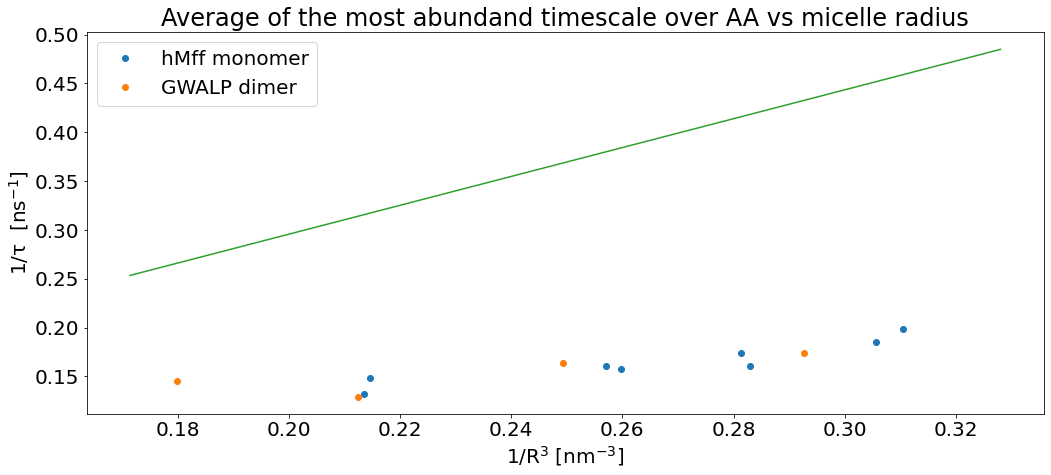

In [25]:
plt.plot(radius_hmff,aikaskaalat_hmff,"o",label='hMff monomer')
plt.plot(radius_gwalp,aikaskaalat_gwalp,"o",label='GWALP dimer')
plt.plot(radius,real_water)
plt.legend()
plt.xlabel("1/R$^3$ [nm$^{-3}$]")
plt.ylabel("1/τ  [ns$^{-1}$]")
plt.title("Average of the most abundand timescale over AA vs micelle radius")

plt.savefig("rot_vs_rad.pdf")

In [26]:
radius_hmff

[0.30566236009739484,
 0.31049016843191557,
 0.2829536999424204,
 0.2814025232558913,
 0.2570235157400322,
 0.25970864248520786,
 0.21345546200808446,
 0.21460874576965083]

In [29]:
np.savetxt("radius_hmff.dat",radius_hmff)
np.savetxt("radius_gwalp.dat",radius_gwalp)
np.savetxt("radius_water.dat",radius)
np.savetxt("timescale_hmff.dat",aikaskaalat_hmff)
np.savetxt("timescale_gwalp.dat",aikaskaalat_gwalp)
np.savetxt("timescale_real_water.dat",real_water)

In [28]:
radius

[0.3280167288531715, 0.17146776406035663]